In [90]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline
pd.set_option('display.width', 1)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [80]:
dfbike=pd.read_csv("Bikeshare_train.csv")
dfbike.head()
dfadd=pd.read_csv("add_train.csv")
dfadd.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


In [81]:
dfcomplete = pd.concat( [dfbike, dfadd], axis=1 )
dfcomplete.head()

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count,TimeMin,PickupCount
0,0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0,860.0,33.0
1,1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0,17.0,75.0
2,2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0,486.0,13.0
3,3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0,300.0,5.0
4,4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0,385.0,10.0


In [82]:
dfcomplete=dfcomplete.rename(columns={"Unnamed: 0" : "name"})
dfcomplete.head()
dfcomplete.shape
dfcomplete.columns

Index(['name', 'season', 'month', 'holiday', 'day_of_week', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'TimeMin', 'PickupCount'], dtype='object')

In [83]:
#step 1---sort data "TimeMin"
dfcomplete['TimeMin']

0       860.0
1        17.0
2       486.0
3       300.0
4       385.0
5       639.0
6       819.0
7       883.0
8       690.0
9        68.0
10       40.0
11      442.0
12     1077.0
13      727.0
14      800.0
15     1396.0
16      709.0
17      148.0
18     1072.0
19      851.0
20     1365.0
21     1279.0
22      863.0
23      124.0
24     1123.0
25      633.0
26      342.0
27      381.0
28      740.0
29     1029.0
        ...  
301       NaN
302       NaN
303       NaN
304       NaN
305       NaN
306       NaN
307       NaN
308       NaN
309       NaN
310       NaN
311       NaN
312       NaN
313       NaN
314       NaN
315       NaN
316       NaN
317       NaN
318       NaN
319       NaN
320       NaN
321       NaN
322       NaN
323       NaN
324       NaN
325       NaN
326       NaN
327       NaN
328       NaN
329       NaN
330       NaN
Name: TimeMin, Length: 331, dtype: float64

In [84]:
# I sort the "TimeMin" data, reindexed the "name"  to create a new form
new_bike=dfcomplete.sort_values("TimeMin",ascending=True)
bike_reindexed=new_bike.reset_index(drop=True)
print(bike_reindexed) 

     name  season  month  holiday  day_of_week  workingday  weather  temp  atemp  humidity  windspeed   count  TimeMin  PickupCount
0      36     4.0   12.0      0.0          1.0         1.0      2.0  12.0   16.0   92.5000   0.190308  5170.0      4.0         58.0
1      56     2.0    5.0      0.0          4.0         1.0      1.0  26.0   27.0   71.6667   0.172896  6770.0      7.0         16.0
2       1     4.0   12.0      0.0          2.0         1.0      1.0  15.0   19.0   73.3750   0.174129  6606.0     17.0         75.0
3     239     4.0   11.0      0.0          6.0         0.0      1.0   5.0   10.0   54.5417   0.179729  5629.0     19.0         61.0
4      10     3.0    8.0      0.0          0.0         0.0      2.0  26.0   27.0   84.5833   0.228858  5255.0     40.0         24.0
5     100     3.0    7.0      0.0          0.0         0.0      1.0  37.0   39.0   57.3750   0.125629  4672.0     43.0         16.0
6     190     1.0    2.0      0.0          5.0         1.0      2.0   3.0   

In [85]:
#step 2---cleaning data "TimeMin"
TimeMin=bike_reindexed['TimeMin']
TimeMin_is_null=pd.isnull(TimeMin)#pan duan mou zhi shi fou shi que shi zhi !xian shi true huozhe false
cleaned_databike=bike_reindexed[TimeMin_is_null==False] 
print(cleaned_databike)
# Thus, there are only 250 samples left

     name  season  month  holiday  day_of_week  workingday  weather  temp  atemp  humidity  windspeed   count  TimeMin  PickupCount
0      36     4.0   12.0      0.0          1.0         1.0      2.0  12.0   16.0   92.5000   0.190308  5170.0      4.0         58.0
1      56     2.0    5.0      0.0          4.0         1.0      1.0  26.0   27.0   71.6667   0.172896  6770.0      7.0         16.0
2       1     4.0   12.0      0.0          2.0         1.0      1.0  15.0   19.0   73.3750   0.174129  6606.0     17.0         75.0
3     239     4.0   11.0      0.0          6.0         0.0      1.0   5.0   10.0   54.5417   0.179729  5629.0     19.0         61.0
4      10     3.0    8.0      0.0          0.0         0.0      2.0  26.0   27.0   84.5833   0.228858  5255.0     40.0         24.0
5     100     3.0    7.0      0.0          0.0         0.0      1.0  37.0   39.0   57.3750   0.125629  4672.0     43.0         16.0
6     190     1.0    2.0      0.0          5.0         1.0      2.0   3.0   

In [119]:
#step 3---Normalize the TimeMin predictor to a value between  0 and 1
cleaned_databike['TimeMin'] = cleaned_databike['TimeMin'].apply(lambda x: x/1440)
print(cleaned_databike)

     name  \
0      36   
1      56   
2       1   
3     239   
4      10   
5     100   
6     190   
7     145   
8     225   
9      68   
10      9   
11    181   
12    184   
13    193   
14    152   
15     85   
16     39   
17    217   
18    133   
19    234   
20     44   
21    105   
22     23   
23     38   
24     97   
25     51   
26     17   
27    131   
28    216   
29    214   
..    ...   
220    37   
221    21   
222   106   
223   209   
224    49   
225    88   
226   203   
227   242   
228   240   
229    59   
230   247   
231   249   
232   115   
233    96   
234   232   
235   246   
236    79   
237    20   
238    84   
239    57   
240   128   
241    70   
242   243   
243    15   
244   220   
245   108   
246   200   
247   171   
248   238   
249   173   

     season  \
0       4.0   
1       2.0   
2       4.0   
3       4.0   
4       3.0   
5       3.0   
6       1.0   
7       2.0   
8       3.0   
9       1.0   
10      3.0   
11      2.0  

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


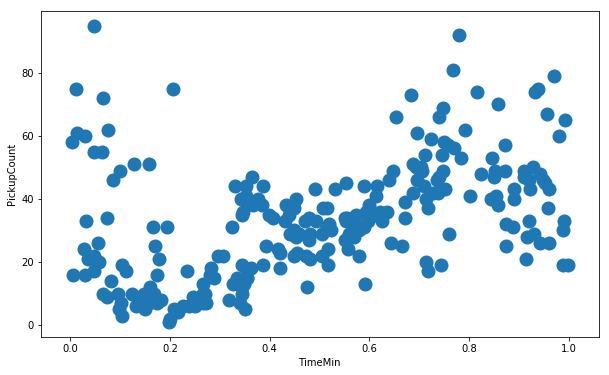

In [92]:
# 1.1.1 [2 pts]
#Generate a scatter plot of the training data points with the time of the day on the𝑋-axis 
#and the number of taxi pickups on the  𝑌-axis.
fig,ax=plt.subplots(1,1,figsize=(10,6))
with sns.plotting_context('poster'): 
    plt.xlabel("TimeMin")
    plt.ylabel("PickupCount")
    plt.scatter(cleaned_databike['TimeMin'], cleaned_databike['PickupCount'])

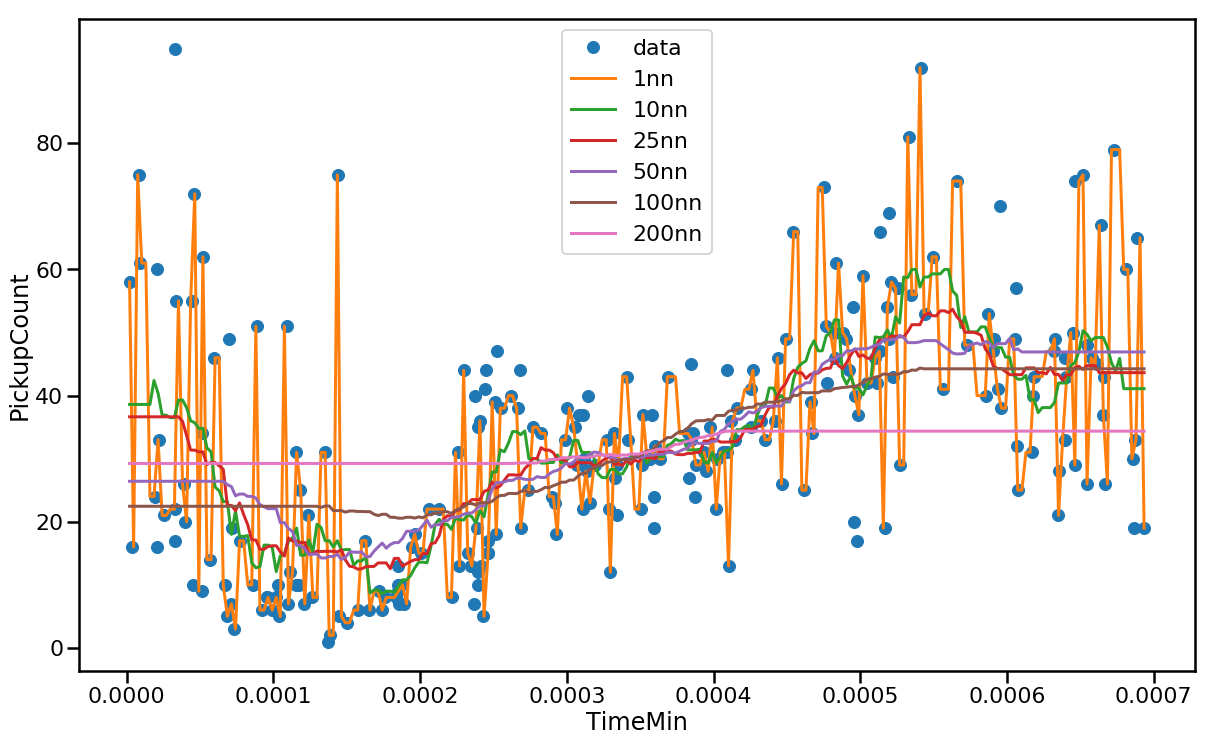

In [166]:
#1.2.1 [6pts]
#Fit a k-NN regression model to the training set for different values of  k
#(e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200).
length_dataframe=cleaned_databike.shape[0]
xtrain = cleaned_databike.TimeMin.values
ytrain = cleaned_databike.PickupCount.values
Xtrain = xtrain.reshape(xtrain.shape[0], 1)
from sklearn.neighbors import KNeighborsRegressor
regdict = {}
from sklearn.metrics import mean_squared_error
for k in [1, 2, 10, 25, 50,100,200]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain,ytrain)
    regdict[k] = knnreg
    knnreg.fit(Xtrain, ytrain)
    r2 = knnreg.score(Xtrain,ytrain)
    r2
with sns.plotting_context('poster'):
    fig,ax=plt.subplots(1,1,figsize=(20,12))
    plt.xlabel("TimeMin")
    plt.ylabel("PickupCount")
    plt.plot(cleaned_databike.TimeMin, cleaned_databike.PickupCount, 'o', label="data")
    xgrid = np.linspace(np.min(cleaned_databike.TimeMin), np.max(cleaned_databike.TimeMin), 250)
    for k in [1, 2, 10, 25, 50,100,200]:
        predictions = regdict[k].predict(xgrid.reshape(250,1))
        if k in [1,10,25,50,100,200]:
            plt.plot(xgrid, predictions, label="{}nn".format(k))
    plt.legend();

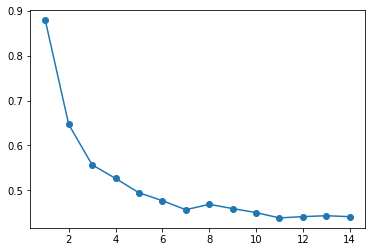

In [167]:
ks = range(1, 15)
scores_train = []
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain, ytrain)
    score_train = knnreg.score(Xtrain, ytrain)
    scores_train.append(score_train)
plt.plot(ks, scores_train,'o-');

In [168]:
#1.3.1 [6 pts]: Fit a linear regression model to the training set.
#import linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(Xtrain, ytrain)

#predict y-values
predicted_y = regression.predict(Xtrain)

#score predictions (sklearn gives you R^2 as well)
r2 = regression.score(Xtrain, ytrain)
r2

0.2072137520989403